In [2]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

In [3]:
mushrooms = pd.read_csv(r'/home/spark/510 Assignment/510 Assignment/510 assignment1/Codes/mushroom.csv')

In [4]:
mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [18]:
mushrooms.corr

<bound method DataFrame.corr of       class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
5         0          5            3          9        1     0   
6         0          0            2          8        1     0   
7         0          0            3          8        1     3   
8         1          5            3          8        1     6   
9         0          0            2          9        1     0   
10        0          5            3          9        1     3   
11        0          5            3          9        1     0   
12        0          0            2          9        1     0   
13        1          5            3          8        1   

In [68]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in mushrooms.columns:
    mushrooms[col] = labelencoder.fit_transform(mushrooms[col])
 
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [5]:
print(mushrooms.shape)

(8124, 23)


In [6]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
# show how number of  ediate vs poisonous mushrooms
print(mushrooms.groupby('class').size())

class
e    4208
p    3916
dtype: int64


In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in mushrooms.columns:
    mushrooms[col] = labelencoder.fit_transform(mushrooms[col])
 
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [9]:
x = mushrooms.iloc[:,1:23]  # all rows, all the features and no labels
y = mushrooms.iloc[:, 0]  # all rows, label only
x.head()
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [10]:
x.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [11]:
x.corr()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
cap-shape,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972
stalk-shape,0.063794,-0.014123,-0.456496,0.099364,0.459766,0.186485,0.080895,0.214576,-0.175699,1.000000,...,-0.034399,0.223439,0.235794,NaN,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(x)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ..., 
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [15]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[ -5.74321902e-01,  -9.75781349e-01,  -1.22176154e+00, ...,
         -2.08581362e-01,   8.13996758e-03,  -4.94833656e-18],
       [ -2.28210230e+00,   2.79066333e-01,  -1.20049669e+00, ...,
          1.52238789e-01,  -1.96446132e-01,   1.35346753e-17],
       [ -1.85803562e+00,  -2.70972362e-01,  -1.37237069e+00, ...,
          2.57581784e-01,  -3.62577199e-01,   6.00414478e-18],
       ..., 
       [ -1.62151632e+00,  -7.57536709e-01,   2.73357994e+00, ...,
         -1.42532241e+00,   6.36990122e-01,   2.18013187e-19],
       [  3.67060561e+00,  -1.03277450e+00,   1.68459501e-01, ...,
          9.41440123e-02,  -6.43462238e-02,  -1.23849459e-20],
       [ -1.57520272e+00,  -1.22858140e+00,   2.44722789e+00, ...,
         -8.04626064e-01,   5.90315263e-01,   2.31176397e-20]])

In [16]:
covariance=pca.get_covariance()


In [17]:
explained_variance=pca.explained_variance_
explained_variance

array([  3.87410924e+00,   2.60339434e+00,   2.40073834e+00,
         2.16674719e+00,   1.70303181e+00,   1.39495575e+00,
         9.78803667e-01,   9.51936841e-01,   7.70036405e-01,
         7.11748353e-01,   5.77556532e-01,   5.42484855e-01,
         5.09631267e-01,   4.77214086e-01,   3.84467203e-01,
         3.11228233e-01,   2.18649656e-01,   1.59514884e-01,
         1.31521687e-01,   7.31993474e-02,   6.16155691e-02,
         7.63706621e-35])

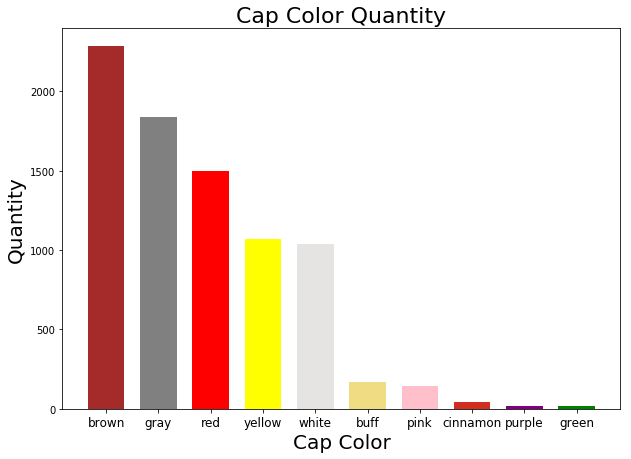

In [18]:
cap_colors = mushrooms['cap-color'].value_counts()
m_height = cap_colors.values.tolist() #Provides numerical values
cap_colors.axes #Provides row labels
cap_color_labels = cap_colors.axes[0].tolist() #Converts index object to list

#=====PLOT Preparations and Plotting====#
ind = np.arange(10)  # the x locations for the groups
width = 0.7        # the width of the bars
colors = ['brown','gray','red','yellow','#E5E4E2','#F0DC82','pink','#D22D1E','purple','green']
#FFFFF0
fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Cap Color Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'), fontsize = 12)
plt.show()

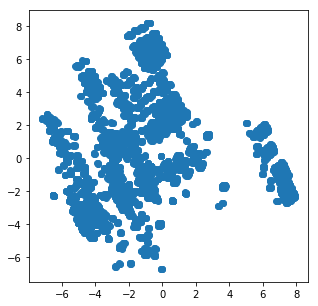

In [19]:
N=mushrooms.values
pca = PCA(n_components=2)

x = pca.fit_transform(N)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(x, test_size=0.3)


In [21]:
mushrooms[mushrooms.columns[1:23]].head(5)
Labeledmushrooms = pd.get_dummies(mushrooms[mushrooms.columns[1:23]])
Labeledmushrooms.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [22]:

from sklearn.preprocessing import LabelEncoder

Labeledmushrooms['class'] = LabelEncoder().fit_transform(mushrooms['class'])
Labeledmushrooms.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


In [19]:
from sklearn import svm
from sklearn import preprocessing #change non numberic values to numeric
from sklearn.model_selection import train_test_split
le=preprocessing.LabelEncoder()
for col in mushrooms.columns:
    mushrooms[col]=le.fit_transform(mushrooms[col])
x = mushrooms.iloc[:,1:23]  # all rows, all the features and no labels
y = mushrooms.iloc[:, 0]  # all rows, label only
import numpy as np


from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

scaler = preprocessing.StandardScaler()
x_train=scaler.fit_transform(x_train)


clf = svm.SVC()
clf.fit(X_train, y_train)

x_test=scaler.fit_transform(x_test)
y_predict=clf.predict(x_test)
x_test=scaler.fit_transform(x_test)

from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict)
print(score)

0.472957851548


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR= LogisticRegression()



In [36]:

LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
y_prob = LR.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR.score(x_test, y_pred)

1.0

In [38]:
cm=metrics.confusion_matrix(y_test,y_pred)
cm


array([[629, 216],
       [196, 584]])

In [39]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.74654832347140043

In [40]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.83702321347291764

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5,0,'False Positive Rate')

In [42]:
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X=mushrooms.iloc[:,1:23]
y=mushrooms.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)

clf = svm.SVC()
clf.fit(X_train, y_train)

X_test=scaler.fit_transform(X_test)
y_predict=clf.predict(X_test)

from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict)
print(score)



1.0


In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5,0,'False Positive Rate')

In [48]:
# random forest
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators = 100)


In [82]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:


y_prob = rf.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
rf.score(X_test, y_pred)



1.0

In [54]:


confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix



array([[1378,    0],
       [   0, 1303]])

In [55]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00      1378\n          1       1.00      1.00      1.00      1303\n\navg / total       1.00      1.00      1.00      2681\n'

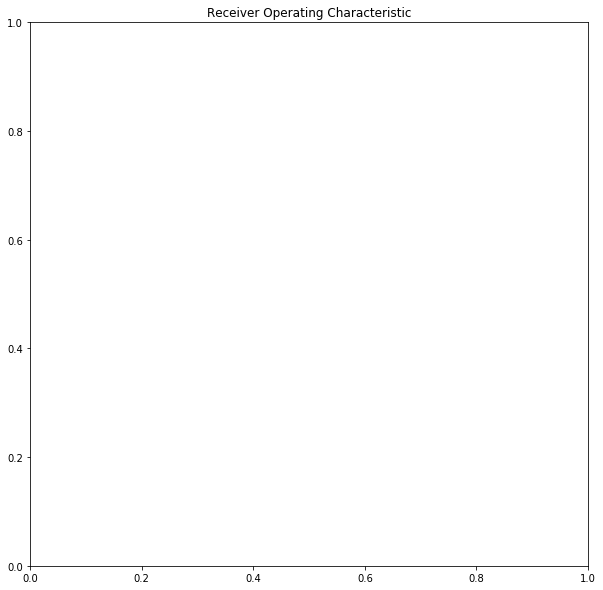

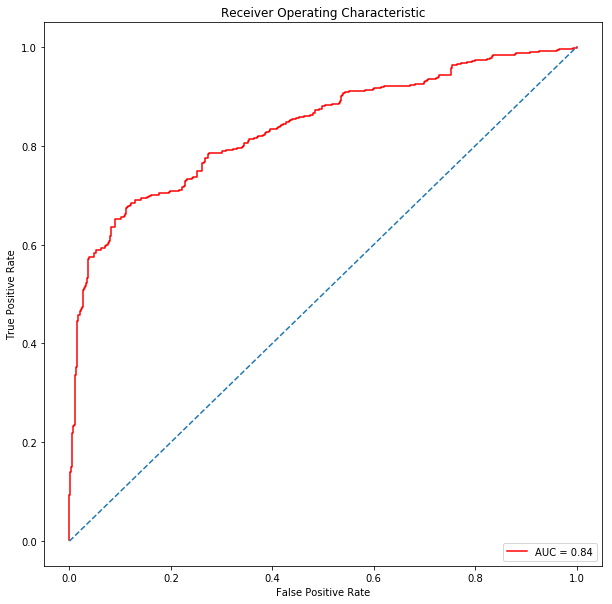

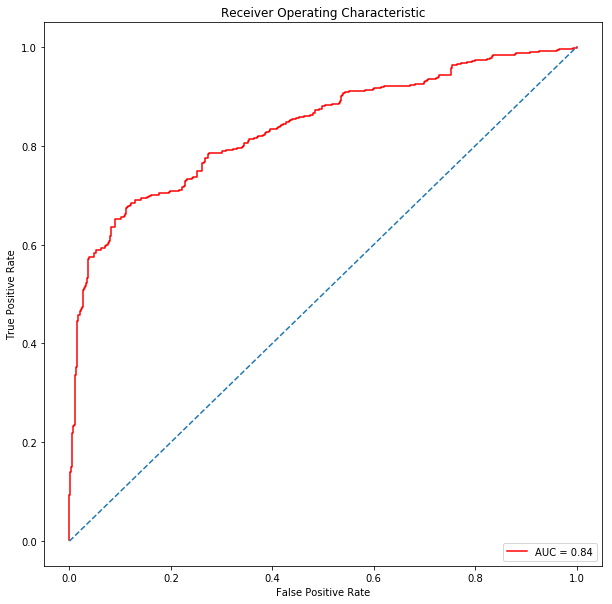

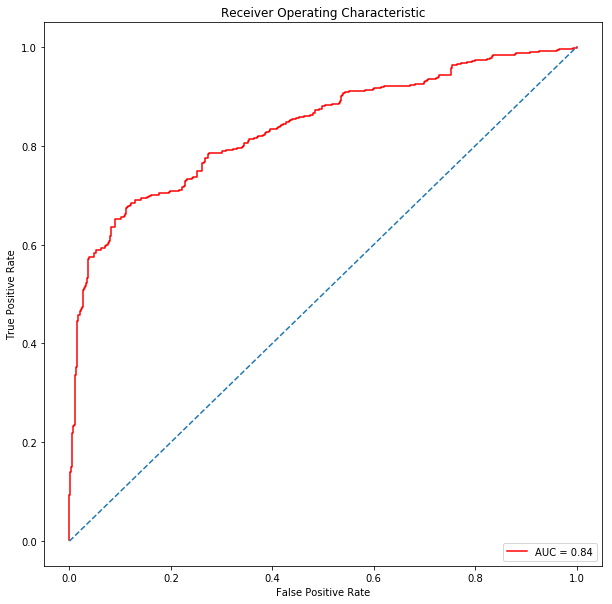

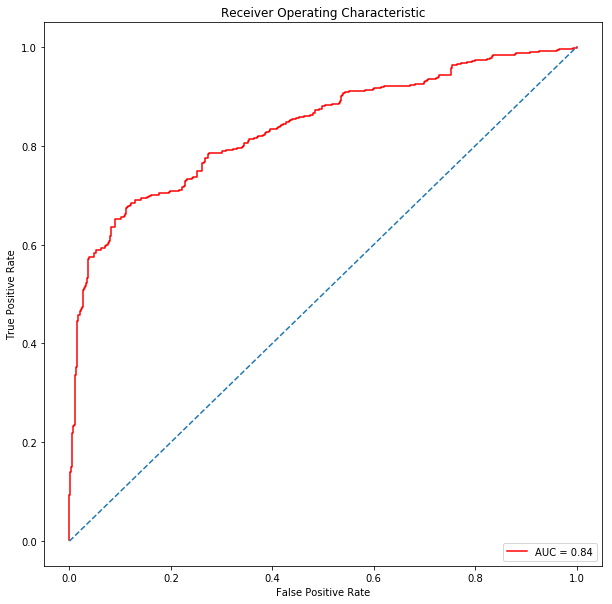

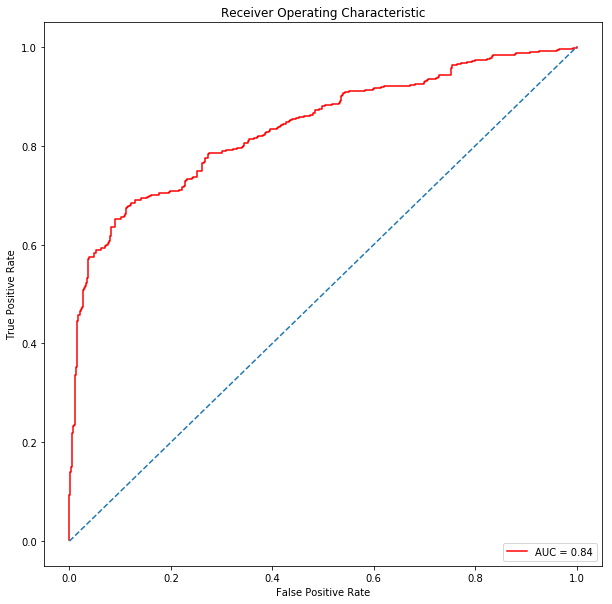

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [73]:
#deep learning neural networks
from sklearn.neural_network import MLPClassifier



In [75]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

y_prob = mlp.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
mlp.score(X_test, y_pred)



1.0

In [76]:


confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix



array([[1378,    0],
       [   0, 1303]])

In [77]:


auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc




'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00      1378\n          1       1.00      1.00      1.00      1303\n\navg / total       1.00      1.00      1.00      2681\n'

In [78]:


auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc




1.0

In [79]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

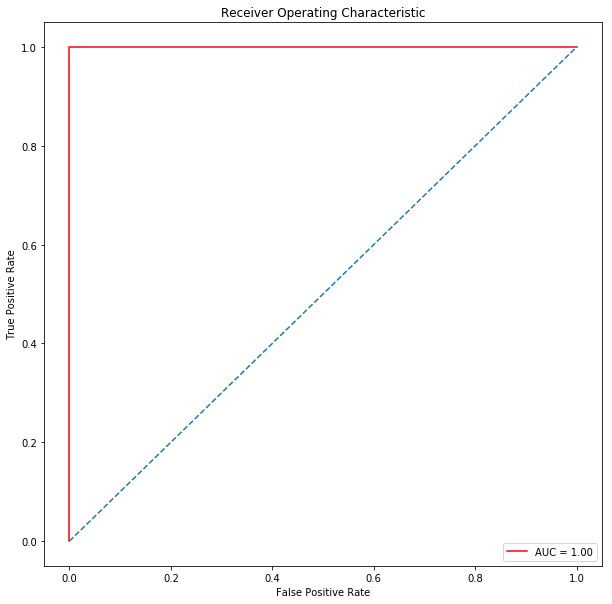

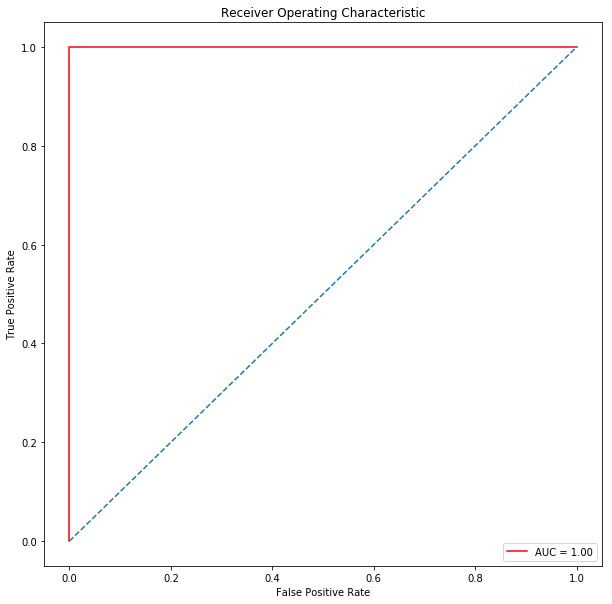

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()